# Chapter 12 판다스로 데이터를 분석해보자 

## LAB 12-1 울릉도는 몇 월에 바람이 가장 강할까? 

#### 앞서 사용했던 울릉도의 기상 데이터에는 일일 평균 풍속 데이터가 있다. 이 데이터를 바탕으로 몇 월의 울릉도가 가장 바람이 강한지 알아 보고 싶다. 결과는 아래와 같다. 달이 0부터 시작하여 11(실제는 1월부터 12월)까지 있고, 3일 때에 가장 큰 풍속을 보이므로, 울릉도는 4월에 가장 강한 바람이 분다는 것을 알 수 있다.

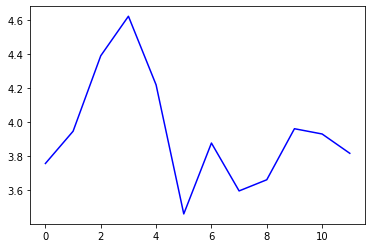

In [1]:
import csv
import matplotlib.pyplot as plt

f = open('C:/Users/lhk65/OneDrive/Desktop/Project/Python_Programming/Part 2/Chapter 12/weather.csv')
data = csv.reader(f)
header = next(data)

monthly_wind = [0 for x in range(12)]
days_counted = [0 for x in range(12)]

for row in data:
    month = int(row[0][5:7])
    if row[3] != '':
        wind = float(row[3])
        monthly_wind[month-1] += wind
        days_counted[month-1] += 1

for i in range(12):
    monthly_wind[i] /= days_counted[i]
    
plt.plot(monthly_wind, 'blue')
plt.show()

f.close()

## LAB 12-2 판다스로 울릉도의 바람 세기 분석하기

#### 앞서 사용했던 울릉도의 기상 데이터에 기록된 매일의 평균 풍속 데이터를 바탕으로 몇 월의 바람이 가장 강한지 분석해 보았다. 이번에는 이 작업을 판다스를 이용하여 해 보려고 한다. 결과는 앞의 것도 동일하게 나올 것이다.

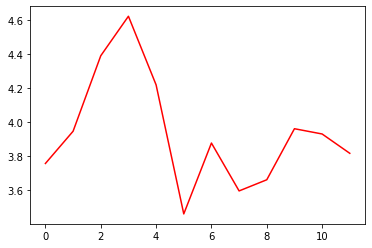

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

weather = pd.read_csv('C:/Users/lhk65/OneDrive/Desktop/Project/Python_Programming/Part 2/Chapter 12/weather.csv', encoding='CP949')
monthly = [None for x in range(12)]
monthly_wind = [0 for x in range(12)]
weather['month'] = pd.DatetimeIndex(weather['일시']).month

for i in range(12):
    monthly[i] = weather[weather['month'] == i+1]
    monthly_wind[i] = monthly[i].mean(numeric_only=True)['평균 풍속(m/s)']

plt.plot(monthly_wind, 'red')
plt.show()

## LAB 12-3 울릉도는 몇 월에 바람이 가장 강할까? - `groupby()` 활용

#### 울릉도의 기상 데이터에 기록된 매일의 평균 풍속 데이터를 바탕으로 몇 월의 바람이 가장 강한지 분석해 보았다. 이번에는 판다스가 제공하는 `groupby()` 함수로 더욱 효율적으로 만들어 보라.

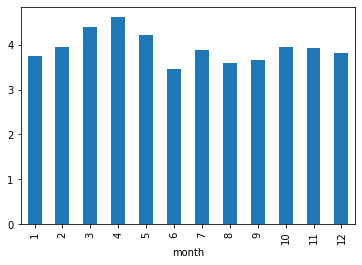

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt

weather = pd.read_csv('C:/Users/lhk65/OneDrive/Desktop/Project/Python_Programming/Part 2/Chapter 12/weather.csv', encoding='CP949')

weather['month'] = pd.DatetimeIndex(weather['일시']).month
means = weather.groupby('month').mean()
means['평균 풍속(m/s)'].plot(kind='bar')

plt.show()

## LAB 12-4 다양한 방법으로 concat 적용해 보기

#### 앞서 생성한 `df_1`과 `df_2` 데이터프레임을 합치는 데에 `concat`의 `axis`와 `join` 매개변수에 인자를 다양하게 적용하여 결과를 확인해보라.

In [12]:
import pandas as pd

df_1 = pd.DataFrame({'A': ['a10', 'a11', 'a12'], 'B': ['b10', 'b11', 'b12'], 'C':['c10', 'c11', 'c12']}, index = ['가', '나', '다'])
df_2 = pd.DataFrame({'B': ['b23', 'b24', 'b25'], 'C': ['c23', 'c24', 'c25'], 'D':['d23', 'd24', 'd25']}, index = ['다', '라', '마'])

print(pd.concat([df_1, df_2], axis=0, join='outer'))
print(pd.concat([df_1, df_2], axis=0, join='inner'))
print(pd.concat([df_1, df_2], axis=1, join='outer'))
print(pd.concat([df_1, df_2], axis=1, join='inner'))

     A    B    C    D
가  a10  b10  c10  NaN
나  a11  b11  c11  NaN
다  a12  b12  c12  NaN
다  NaN  b23  c23  d23
라  NaN  b24  c24  d24
마  NaN  b25  c25  d25
     B    C
가  b10  c10
나  b11  c11
다  b12  c12
다  b23  c23
라  b24  c24
마  b25  c25
     A    B    C    B    C    D
가  a10  b10  c10  NaN  NaN  NaN
나  a11  b11  c11  NaN  NaN  NaN
다  a12  b12  c12  b23  c23  d23
라  NaN  NaN  NaN  b24  c24  d24
마  NaN  NaN  NaN  b25  c25  d25
     A    B    C    B    C    D
다  a12  b12  c12  b23  c23  d23


## LAB 12-5 다양한 방법으로 merge 적용해 보기

#### 앞서 생성한 `df_1`과 `df_2` 데이터프레임을 합치는 데에 `merge()`의 `how` 매개면수에는 네 종류의 인자를 넘길 수 있다. `on='B'`를 유지한채로 `how`를 변경하여 다양한 결과를 확인해 보라.

In [13]:
import pandas as pd

df_1 = pd.DataFrame({'A': ['a10', 'a11', 'a12'], 'B': ['b10', 'b11', 'b12'], 'C':['c10', 'c11', 'c12']}, index = ['가', '나', '다'])
df_2 = pd.DataFrame({'B': ['b23', 'b24', 'b25'], 'C': ['c23', 'c24', 'c25'], 'D':['d23', 'd24', 'd25']}, index = ['다', '라', '마'])

print('left outer \n', df_1.merge(df_2, how='left', on='B'))
print('right outer \n', df_1.merge(df_2, how='right', on='B'))
print('full outer \n', df_1.merge(df_2, how='outer', on='B'))
print('inner \n', df_1.merge(df_2, how='inner', on='B'))

left outer 
      A    B  C_x  C_y    D
0  a10  b10  c10  NaN  NaN
1  a11  b11  c11  NaN  NaN
2  a12  b12  c12  NaN  NaN
right outer 
      A    B  C_x  C_y    D
0  NaN  b23  NaN  c23  d23
1  NaN  b24  NaN  c24  d24
2  NaN  b25  NaN  c25  d25
full outer 
      A    B  C_x  C_y    D
0  a10  b10  c10  NaN  NaN
1  a11  b11  c11  NaN  NaN
2  a12  b12  c12  NaN  NaN
3  NaN  b23  NaN  c23  d23
4  NaN  b24  NaN  c24  d24
5  NaN  b25  NaN  c25  d25
inner outer 
 Empty DataFrame
Columns: [A, B, C_x, C_y, D]
Index: []
